In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from bokeh.io import output_notebook, show
#from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20_20
from bokeh.models.tools import HoverTool
#output_file("bar_colormapped.html")
output_notebook()

+ Đọc bộ dữ liệu 

In [6]:
df=pd.read_excel('/content/sample_data/TestToeic.xlsx')

In [7]:
df.head(10)

,STT,MÃ SV,HỌ ĐỆM,TÊN,NGÀY SINH,LỚP,KHOA,NGÀY THI,GIỜ THI,PHÒNG THI,MÔN ĐỌC,MÔN NGHE,TỔNG ĐIỂM,GHI CHÚ
0,1.0,NaN,NaN,NaN,02/12/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,80.0,185.0,265.0,NaN
1,2.0,NaN,NaN,NaN,15/09/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,45.0,120.0,165.0,NaN
2,3.0,NaN,NaN,NaN,17/03/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,110.0,145.0,255.0,NaN
3,4.0,NaN,NaN,NaN,26/10/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,90.0,150.0,NaN
4,5.0,NaN,NaN,NaN,28/07/1998,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,185.0,245.0,NaN
5,6.0,NaN,NaN,NaN,10/12/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,145.0,205.0,NaN
6,7.0,NaN,NaN,NaN,15/07/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,160.0,220.0,NaN
7,8.0,NaN,NaN,NaN,12/08/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,150.0,130.0,280.0,NaN
8,9.0,NaN,NaN,NaN,15/09/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,110.0,145.0,255.0,NaN
9,10.0,NaN,NaN,NaN,07/06/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,160.0,220.0,NaN


+ Kiểm tra lại thấy bộ dữ liệu đã ổn

# Câu 1 : Xét Giờ Thi Có Ảnh Hưởng Gì Đến Kết Quả Không 

+ Đầu tiên ta cần lấy column Giờ thi và Tổng điểm để so sánh

In [8]:
df_GTKQ= df.loc[:,['GIỜ THI','TỔNG ĐIỂM']]
df_GTKQ

,GIỜ THI,TỔNG ĐIỂM
0,12h00 - 14h40,265.0
1,12h00 - 14h40,165.0
2,12h00 - 14h40,255.0
3,12h00 - 14h40,150.0
4,12h00 - 14h40,245.0
...,...,...
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN


+ Tính trung điểm của từng ca thi

In [9]:
df_GTKQ1 = df_GTKQ.groupby('GIỜ THI').mean()

df_GTKQ1

,TỔNG ĐIỂM
GIỜ THI,
12h00 - 14h40,247.483880
15h00 - 17h30,258.569968


+ Biểu diễn bar chart

In [10]:
data = pd.DataFrame(df_GTKQ1).reset_index()
data

,GIỜ THI,TỔNG ĐIỂM
0,12h00 - 14h40,247.483880
1,15h00 - 17h30,258.569968


In [11]:
src = ColumnDataSource(data)

In [12]:
ht= HoverTool(tooltips=[("GIỜ THI","@{GIỜ THI}"),("TỔNG ĐIỂM","@{TỔNG ĐIỂM}")])
p = figure(x_range=data['GIỜ THI'], plot_height=400, title="BẢNG ĐÁNH GIÁ",tools=[ht])
p.vbar(x='GIỜ THI', top='TỔNG ĐIỂM', width=0.2, color='brown',source=src)
show(p)

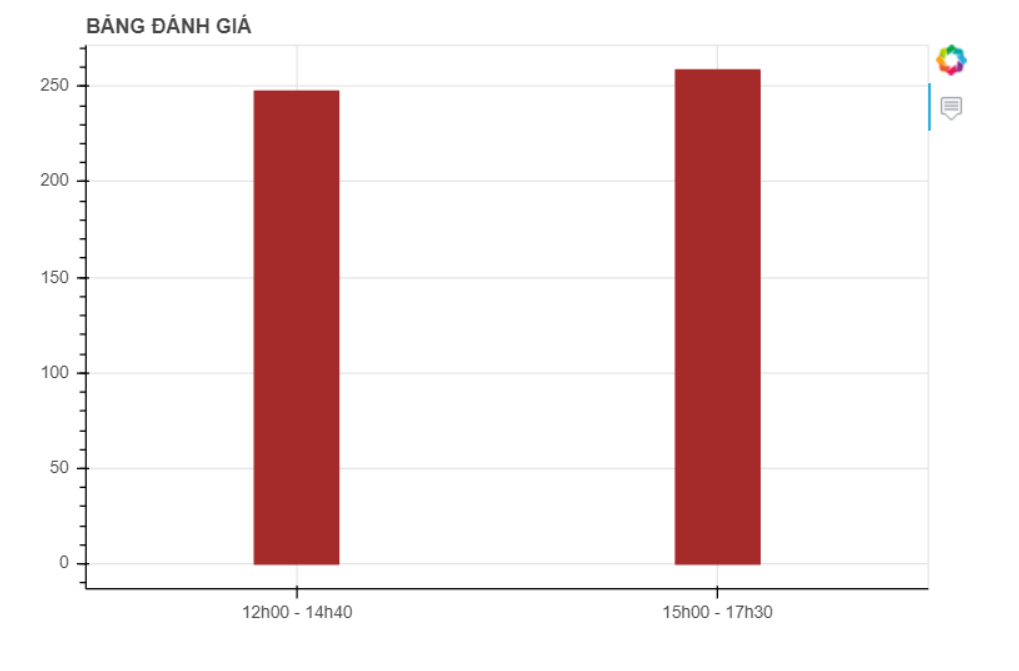

+ Nhìn chung ta thấy 2 ca thi là 15h và 12h nhưng trung bình điểm không quá trên lệch giữa 2 ca
+ Cho thấy giờ thi không quá ảnh hưởng đến điểm của sinh viên

# Câu 2 : Mức Kết Quả Các Thí Sinh Đạt Được Là Bao Nhiêu

+ Tận dụng column Tổng Điểm và STT giải quyết vấn đề 

In [13]:
df2= df.loc[:,['STT','TỔNG ĐIỂM']]
df2

,STT,TỔNG ĐIỂM
0,1.0,265.0
1,2.0,165.0
2,3.0,255.0
3,4.0,150.0
4,5.0,245.0
...,...,...
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN


+ Sử dụng biểu đồ Scatterplot để thấy rõ sự phân bố điểm của sinh viên
+ Nhưng với 6842 dòng dữ liệu vẽ lên Scatterplot sẽ quá nhiều dữ liệu 
+ Chuyển hướng tìm cách lấy ngẫu nhiên 800 sinh viên để có cái nhìn tổng quát hơn về phân bố điểm 

In [14]:
# Lấy ngẫu nhiên
df2_1= np.array(random.sample(range(len(df2)),800))
df2_1

array([4056, 3271, 5589, 2050, 6131,   64, 4453,  181, 2434, 4975,  513,
       3235, 1424, 2508, 2517, 3357, 5276, 3711, 5068,  489, 4953,  365,
       4947, 2049, 1098, 4913, 6302, 5882, 4628, 2448, 2850, 6473, 3136,
        160, 5061, 4835,  620, 6646, 5853, 6111, 3291, 3463, 3232, 3775,
       3528, 4870, 2698,  691, 5124, 5647, 2406, 2218, 6327, 4598, 5670,
       3408, 6463, 1632, 1628, 2721, 2980, 2152, 3368, 3807, 5165, 6796,
       4847, 6468, 2880, 5625,  249, 4595, 3322,   21,  196, 2929, 3715,
       5978, 3434,  463, 4581, 5883, 1354,   44, 1750, 5741, 5602, 5754,
       5490, 1196,   86, 6665, 4373, 6153,  599, 4070,  593, 1024, 5722,
         68, 2619,  521, 3737, 3484, 3437,  877, 6461,  402, 6609, 2160,
       2170, 3960, 1882, 3646, 1859, 3561, 3724, 4810, 2279,  419, 3220,
       4758, 1070, 3181, 4150,  865, 4140, 1385, 5929, 1890,  793, 3055,
       6176,  747, 2928, 4423, 2680, 5665, 6821, 4576, 2066, 3720,  556,
       4943,   17, 3394, 1534, 2547, 5817, 1619, 61

+ Tạo ra bộ Data với ngẫu nhiên 800 sinh viên

In [15]:
df2_2 = df2.loc[df2_1]
df2_2

,STT,TỔNG ĐIỂM
4056,4057.0,175.0
3271,3272.0,135.0
5589,5590.0,125.0
2050,2051.0,160.0
6131,6132.0,270.0
...,...,...
818,819.0,190.0
1227,1228.0,210.0
1486,1487.0,200.0
446,447.0,265.0


In [16]:
src2= ColumnDataSource(df2_2)
src2

ColumnDataSource(id='1077', ...)

+ Biểu diễn phân bố điểm trên Scatterplot

In [17]:
ht= HoverTool(tooltips=[('<b>SỐ THỨ TỰ','@STT'),('<b>Tổng Điểm','@{TỔNG ĐIỂM}')])
p2=figure(plot_width=600, plot_height=500,tools=[ht])

p2.circle(x='STT', y='TỔNG ĐIỂM', source=src2, size=6, color='purple')
p2.xaxis.axis_label = 'SỐ THỨ TỰ'
p2.yaxis.axis_label = 'TỔNG ĐIỂM'
p2.title.text = 'MỨC ĐIỂM TOEIC ĐHCN'
show(p2)

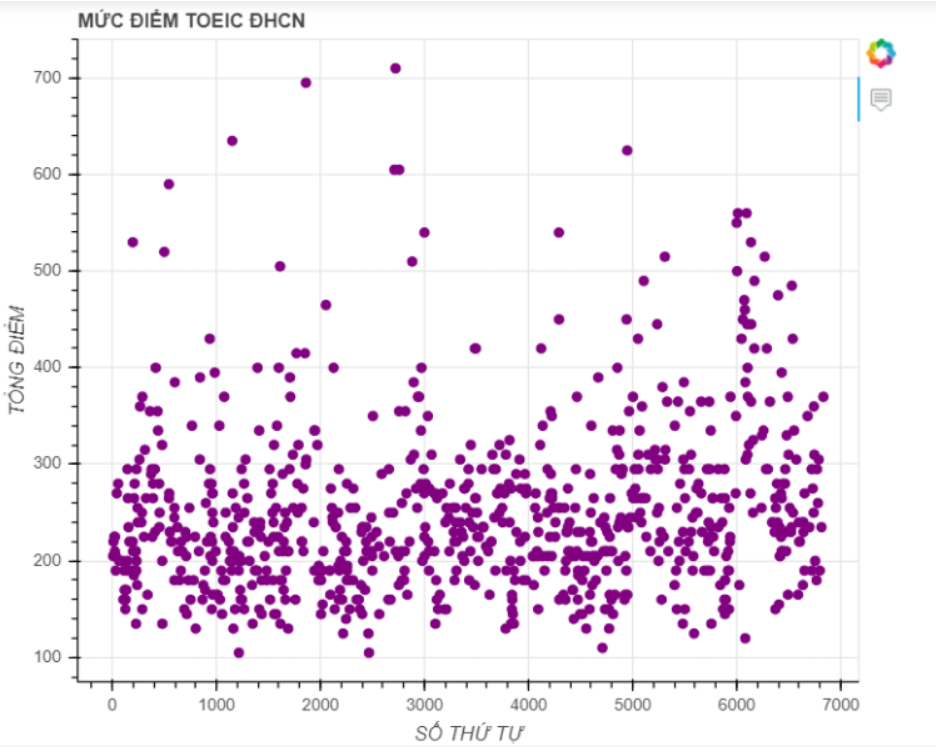

+ Qua biểu đồ ta thấy rõ sự chênh lệch về phân bố
+ Đa phần số điểm tập trung nhiều ở khoản 200 điểm
+ Cho thấy tình trạng đáng báo động về trình độ tiếng Anh của sinh viên
+ Ta không nên vội vàng trong việc áp dụng những giáo trình , tài liệu nước ngoài vào trong việc học mà ưu tiên đưa ra các biện pháp để cải thiện tình hình 

# Câu Hỏi 3 : Liệu có sự chênh lệch điểm giữa các phòng 

+ Quan sát dữ liệu 

In [18]:
df.head(10)

,STT,MÃ SV,HỌ ĐỆM,TÊN,NGÀY SINH,LỚP,KHOA,NGÀY THI,GIỜ THI,PHÒNG THI,MÔN ĐỌC,MÔN NGHE,TỔNG ĐIỂM,GHI CHÚ
0,1.0,NaN,NaN,NaN,02/12/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,80.0,185.0,265.0,NaN
1,2.0,NaN,NaN,NaN,15/09/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,45.0,120.0,165.0,NaN
2,3.0,NaN,NaN,NaN,17/03/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,110.0,145.0,255.0,NaN
3,4.0,NaN,NaN,NaN,26/10/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,90.0,150.0,NaN
4,5.0,NaN,NaN,NaN,28/07/1998,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,185.0,245.0,NaN
5,6.0,NaN,NaN,NaN,10/12/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,145.0,205.0,NaN
6,7.0,NaN,NaN,NaN,15/07/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,160.0,220.0,NaN
7,8.0,NaN,NaN,NaN,12/08/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,150.0,130.0,280.0,NaN
8,9.0,NaN,NaN,NaN,15/09/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,110.0,145.0,255.0,NaN
9,10.0,NaN,NaN,NaN,07/06/2000,CDCNTT19A,CNTT,25/08/2018,12h00 - 14h40,V11.01,60.0,160.0,220.0,NaN


+ Sử dụng column Phòng thi và Tổng điểm để biểu diễn 

In [19]:
dfphong = df[['PHÒNG THI','TỔNG ĐIỂM']]
dfphong

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,265.0
1,V11.01,165.0
2,V11.01,255.0
3,V11.01,150.0
4,V11.01,245.0
...,...,...
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN


+ Tạo đa ta tính điểm trung bình từng phòng 

In [20]:
dfavg = dfphong.groupby('PHÒNG THI').mean().reset_index()
dfavg

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,277.483871
1,V11.02,259.074074
2,V11.03,254.093750
3,V11.04,254.496855
4,V11.05,255.854430
5,V11.06,261.751592
6,V12.01,260.000000
7,V12.02,269.788732
8,V12.03,250.503356
9,V12.04,251.343750


+ Lọc các số điểm dưới 250 có trong phòng 

In [21]:
dfplow = dfphong.loc[dfphong['TỔNG ĐIỂM']<250]
dfplow

,PHÒNG THI,TỔNG ĐIỂM
1,V11.01,165.0
3,V11.01,150.0
4,V11.01,245.0
5,V11.01,205.0
6,V11.01,220.0
...,...,...
6828,X12.06,160.0
6829,X12.06,235.0
6831,X12.06,220.0
6833,X12.06,235.0


+ Đếm số điểm thấp trong từng phòng 

In [22]:
dfflow = dfplow.groupby('PHÒNG THI').count().reset_index()
dfflow

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,75
1,V11.02,80
2,V11.03,85
3,V11.04,84
4,V11.05,94
5,V11.06,88
6,V12.01,77
7,V12.02,66
8,V12.03,85
9,V12.04,95


+ Sử dụng hàm merge để tạo bộ data tận dụng vẻ bokeh

In [23]:
dfavg = pd.merge(dfavg,
 dfflow,
 how='outer',
 on='PHÒNG THI')
dfavg

,PHÒNG THI,TỔNG ĐIỂM_x,TỔNG ĐIỂM_y
0,V11.01,277.483871,75
1,V11.02,259.074074,80
2,V11.03,254.093750,85
3,V11.04,254.496855,84
4,V11.05,255.854430,94
5,V11.06,261.751592,88
6,V12.01,260.000000,77
7,V12.02,269.788732,66
8,V12.03,250.503356,85
9,V12.04,251.343750,95


+ Tương tự với điểm từ 250 đến 340

In [24]:
dfpnor = dfphong.loc[dfphong['TỔNG ĐIỂM']>=250].loc[dfphong['TỔNG ĐIỂM']<=345]
dfpnor

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,265.0
2,V11.01,255.0
7,V11.01,280.0
8,V11.01,255.0
13,V11.01,250.0
...,...,...
6818,X12.06,305.0
6820,X12.06,295.0
6823,X12.06,315.0
6826,X12.06,310.0


In [25]:
dffnor = dfpnor.groupby('PHÒNG THI').count().reset_index()
dffnor

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,49
1,V11.02,66
2,V11.03,56
3,V11.04,61
4,V11.05,40
5,V11.06,46
6,V12.01,58
7,V12.02,55
8,V12.03,51
9,V12.04,46


In [26]:
dfavg = pd.merge(dfavg,
 dffnor,
 how='outer',
 on='PHÒNG THI')
dfavg

,PHÒNG THI,TỔNG ĐIỂM_x,TỔNG ĐIỂM_y,TỔNG ĐIỂM
0,V11.01,277.483871,75,49
1,V11.02,259.074074,80,66
2,V11.03,254.093750,85,56
3,V11.04,254.496855,84,61
4,V11.05,255.854430,94,40
5,V11.06,261.751592,88,46
6,V12.01,260.000000,77,58
7,V12.02,269.788732,66,55
8,V12.03,250.503356,85,51
9,V12.04,251.343750,95,46


+ Đổi tên cột 

In [27]:
dfavg = dfavg.rename(columns = {'TỔNG ĐIỂM_x':'avg'})
dfavg = dfavg.rename(columns = {'TỔNG ĐIỂM_y':'low point'})
dfavg = dfavg.rename(columns = {'TỔNG ĐIỂM':'normal point'})

In [28]:
dfavg

,PHÒNG THI,avg,low point,normal point
0,V11.01,277.483871,75,49
1,V11.02,259.074074,80,66
2,V11.03,254.093750,85,56
3,V11.04,254.496855,84,61
4,V11.05,255.854430,94,40
5,V11.06,261.751592,88,46
6,V12.01,260.000000,77,58
7,V12.02,269.788732,66,55
8,V12.03,250.503356,85,51
9,V12.04,251.343750,95,46


+ Tương tự với điểm cao trên 345

In [29]:
dfphigh = dfphong.loc[dfphong['TỔNG ĐIỂM']>345]
dfphigh

,PHÒNG THI,TỔNG ĐIỂM
10,V11.01,510.0
25,V11.01,350.0
26,V11.01,655.0
48,V11.02,385.0
58,V11.02,390.0
...,...,...
6746,X12.04,620.0
6749,X12.04,385.0
6756,X12.04,370.0
6759,X12.05,390.0


In [30]:
dffhigh = dfphigh.groupby('PHÒNG THI').count().reset_index()
dffhigh

,PHÒNG THI,TỔNG ĐIỂM
0,V11.01,31
1,V11.02,16
2,V11.03,19
3,V11.04,14
4,V11.05,24
5,V11.06,23
6,V12.01,18
7,V12.02,21
8,V12.03,13
9,V12.04,19


In [31]:
dfavg = pd.merge(dfavg,
 dffhigh,
 how='outer',
 on='PHÒNG THI')
dfavg

,PHÒNG THI,avg,low point,normal point,TỔNG ĐIỂM
0,V11.01,277.483871,75,49,31
1,V11.02,259.074074,80,66,16
2,V11.03,254.093750,85,56,19
3,V11.04,254.496855,84,61,14
4,V11.05,255.854430,94,40,24
5,V11.06,261.751592,88,46,23
6,V12.01,260.000000,77,58,18
7,V12.02,269.788732,66,55,21
8,V12.03,250.503356,85,51,13
9,V12.04,251.343750,95,46,19


+ Đổi tên column

In [32]:
dfavg = dfavg.rename(columns = {'TỔNG ĐIỂM':'high point'})
dfavg

,PHÒNG THI,avg,low point,normal point,high point
0,V11.01,277.483871,75,49,31
1,V11.02,259.074074,80,66,16
2,V11.03,254.093750,85,56,19
3,V11.04,254.496855,84,61,14
4,V11.05,255.854430,94,40,24
5,V11.06,261.751592,88,46,23
6,V12.01,260.000000,77,58,18
7,V12.02,269.788732,66,55,21
8,V12.03,250.503356,85,51,13
9,V12.04,251.343750,95,46,19


+ Biễu diễn dữ liệu bằng Area chart

In [33]:
from bokeh.palettes import brewer
from bokeh.plotting import figure

phong = list(dfavg['PHÒNG THI'])
point = ['high point','normal point','low point']

p3 = figure(x_range=phong, y_range=(0, 200),plot_width=900)
p3.grid.minor_grid_line_color = '#eeeeee'

p3.varea_stack(stackers=point, x="PHÒNG THI", color=brewer['Spectral'][3], legend_label=point, source=dfavg)

# reverse the legend entries to match the stacked order
p3.legend.items.reverse()
p3.xaxis.major_label_orientation = "vertical"

show(p3)

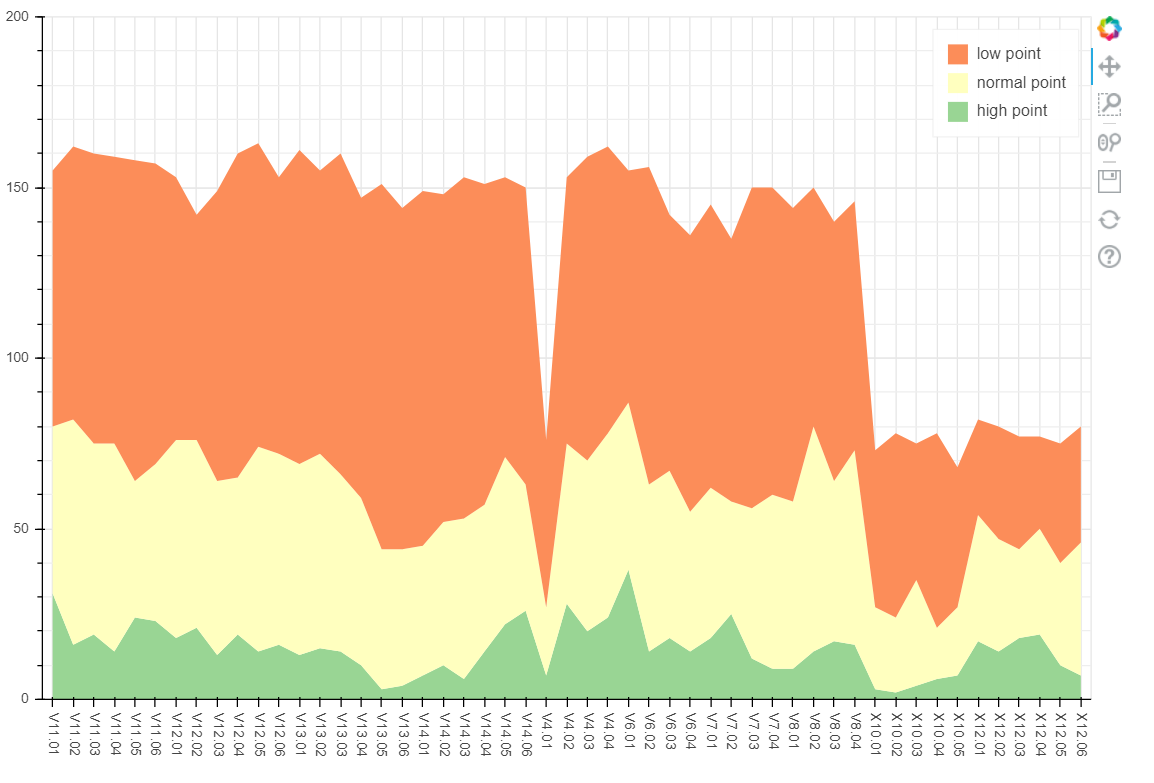

+ Tìm hiểu vì sao cả dãy các phòng liên tiếp V13.05 đến V14.03 lại điểm thấp bất thường 

In [34]:
a = df.loc[df['PHÒNG THI']=='V14.03']
a

,STT,MÃ SV,HỌ ĐỆM,TÊN,NGÀY SINH,LỚP,KHOA,NGÀY THI,GIỜ THI,PHÒNG THI,MÔN ĐỌC,MÔN NGHE,TỔNG ĐIỂM,GHI CHÚ
756,757.0,NaN,NaN,NaN,24/03/2000,CDCK19B,Cơ khí,25/08/2018,12h00 - 14h40,V14.03,80.0,160.0,240.0,NaN
757,758.0,NaN,NaN,NaN,20/11/2000,CDCK19B,Cơ khí,25/08/2018,12h00 - 14h40,V14.03,110.0,120.0,230.0,NaN
758,759.0,NaN,NaN,NaN,01/01/2000,CDCK19B,Cơ khí,25/08/2018,12h00 - 14h40,V14.03,110.0,130.0,240.0,NaN
759,760.0,NaN,NaN,NaN,29/04/2000,CDCK19B,Cơ khí,25/08/2018,12h00 - 14h40,V14.03,90.0,145.0,235.0,NaN
760,761.0,NaN,NaN,NaN,10/11/2000,CDCK19B,Cơ khí,25/08/2018,12h00 - 14h40,V14.03,90.0,130.0,220.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,5896.0,NaN,NaN,NaN,28/10/2000,CDNH19A,TMDL,26/08/2018,15h00 - 17h30,V14.03,60.0,100.0,160.0,NaN
5896,5897.0,NaN,NaN,NaN,25/03/1999,CDNH19A,TMDL,26/08/2018,15h00 - 17h30,V14.03,60.0,145.0,205.0,NaN
5897,5898.0,NaN,NaN,NaN,06/01/2000,CDNH19A,TMDL,26/08/2018,15h00 - 17h30,V14.03,150.0,130.0,280.0,NaN
5898,5899.0,NaN,NaN,NaN,10/12/2000,CDNH19A,TMDL,26/08/2018,15h00 - 17h30,V14.03,110.0,130.0,240.0,NaN


+ có thể thấy trong qua các phòng đó hầu hết là sinh viên hệ cao đẳng 

In [35]:
a.groupby('LỚP').count()

,STT,MÃ SV,HỌ ĐỆM,TÊN,NGÀY SINH,KHOA,NGÀY THI,GIỜ THI,PHÒNG THI,MÔN ĐỌC,MÔN NGHE,TỔNG ĐIỂM,GHI CHÚ
LỚP,,,,,,,,,,,,,
CDCK19B,9,0,0,0,9,9,9,9,9,9,9,9,0
CDCK19C,27,0,0,0,27,27,27,27,27,27,27,27,0
CDNH19A,39,0,0,0,39,39,39,39,39,39,39,39,0
CDOT19F,25,0,0,0,25,25,25,25,25,25,25,25,0
CDOT19G,13,0,0,0,13,13,13,13,13,13,13,13,0
DHTR14A,40,0,0,0,40,40,40,40,40,40,40,40,0


+ Qua Area chart ta thầy qua các phòng thi mặc dù có sự chênh lệch về số lượng sinh viên nhưng số lượng điểm thấp hơn vẫn áp đảo hơn hết.
+ Ta cũng nhận ra rằng các phòng thi V11.01,V14.04,V14.05,V6.01 là các phòng có số lượng điểm trung bình và cao là nổi bật hơn.
+ Ngược lại các phòng như V13.05 đến V14.03 lại có số điểm thấp bất thường thông qua tìm hiểu thì các dãy phòng liên tiếp đó hầu hết là sinh viên hệ cao đẳng .
+ Từ dẫn chứng trên cho ta biết thêm về việc đa phần các sv cao đẳng không tốt tiếng Anh.
+ Đồng thời cũng thấy được sự đồng biến khi có nhiều sinh viên điểm cao thì điểm trung bình cũng tăng lên và điểm thấp cũng giảm xuống không nhiều 
+ Nhưng có vẻ như khi có sinh viên giỏi tiếng Anh trong phòng điểm số phòng thi cũng được cải thiện .

# CÂU 4: SO SÁNH DỮ LIỆU ĐIỂM THI THEO BẬC CĐ VÀ ĐH CỦA TỪNG KHOA

+ LỌC THEO LỚP-KHOA-ĐIỂM

In [36]:
df_loc_LOP = df.loc[:,['LỚP','KHOA','TỔNG ĐIỂM']]
df_loc_LOP

,LỚP,KHOA,TỔNG ĐIỂM
0,CDCNTT19A,CNTT,265.0
1,CDCNTT19A,CNTT,165.0
2,CDCNTT19A,CNTT,255.0
3,CDCNTT19A,CNTT,150.0
4,CDCNTT19A,CNTT,245.0
...,...,...,...
6837,NaN,NaN,NaN
6838,NaN,NaN,NaN
6839,NaN,NaN,NaN
6840,NaN,NaN,NaN


+ LỌC VÀ KIỂM TRA DATA BỊ MẤT DỮ LIỆU

In [37]:
df_unNaN_LOP=df_loc_LOP.dropna()
df_unNaN_LOP['LỚP'].unique()

array(['CDCNTT19A', 'CDCNTT19B', 'CDCNTT19C', 'CDCNTT19D', 'DHTH14A',
       'DHTH14B', 'DHTH14C', 'DHTH14D', 'DHTH14E', 'CDCK19A', 'CDCK19B',
       'CDCK19C', 'DHCDT14A', 'DHCDT14B', 'DHCK14A', 'DHCK14B', 'DHCT14A',
       'DHCT14B', 'CDDI19A', 'CDDI19B', 'CDDI19C', 'CDDI19D', 'DHDI14A',
       'DHDI14B', 'DHDI14C', 'DHDI14D', 'CDDT19A', 'DHDT14A', 'DHTKTR14A',
       'DHDT14B', 'DHDT14C', 'DHDTMT14A', 'CDOT19A', 'CDOT19B', 'CDOT19C',
       'CDOT19D', 'CDOT19E', 'CDTN19A', 'CDOT19F', 'CDOT19G', 'CDOT19H',
       'CDOT19I', 'DHOT14A', 'DHOT14B', 'CDHO19A', 'DHHO14A', 'DHHO14B',
       'DHHO14C', 'DHHO14D', 'CDKT19A', 'CDKT19B', 'CDKT19C', 'CDKT19D',
       'DHKT14A', 'DHKT14B', 'DHKT14C', 'DHKT14D', 'DHKT14E', 'DHKT14F',
       'DHKT14I', 'DHLKT14A', 'DHLQT14A', 'CDCNM19A', 'CDCNM19B',
       'DHTR14A', 'DHTR14B', 'CDNL19A', 'DHNL14A', 'DHNL14B', 'CDMK19A',
       'CDQT19A', 'CDQT19B', 'CDQT19C', 'CDQT19D', 'CDQT19E', 'DHMK14A',
       'DHMK14B', 'DHQT14A', 'DHQT14B', 'DHQT14C', 'DHQ

+ LỌC CÁC LỚP HỆ CĐ

In [38]:
df_CD=df_unNaN_LOP[df_unNaN_LOP.LỚP.str.contains('CD')]
df_CD

,LỚP,KHOA,TỔNG ĐIỂM
0,CDCNTT19A,CNTT,265.0
1,CDCNTT19A,CNTT,165.0
2,CDCNTT19A,CNTT,255.0
3,CDCNTT19A,CNTT,150.0
4,CDCNTT19A,CNTT,245.0
...,...,...,...
5950,CDNH19B,TMDL,190.0
5951,CDNH19B,TMDL,210.0
5952,CDNH19B,TMDL,370.0
5953,CDNH19B,TMDL,180.0


+ GOM NHÓM ĐIỂM TRUNG BÌNH CÁC LỚP CĐ THEO KHOA

In [39]:
df_group_CD = df_CD.groupby('KHOA').mean().reset_index()
df_group_CD

,KHOA,TỔNG ĐIỂM
0,CNTT,220.557621
1,Cơ khí,230.528701
2,Hóa,201.388889
3,Kế Toán,215.941704
4,MTR,225.050505
5,Nhiệt lạnh,203.534483
6,QTKD,221.682243
7,TCNH,233.083333
8,TMDL,229.916667
9,Điện,207.300469


+ LỌC CÁC LỚP HỆ ĐH

In [40]:
df_DH=df_unNaN_LOP[df_unNaN_LOP.LỚP.str.contains('DH')]
df_DH

,LỚP,KHOA,TỔNG ĐIỂM
269,DHTH14A,CNTT,210.0
270,DHTH14A,CNTT,240.0
271,DHTH14A,CNTT,305.0
272,DHTH14A,CNTT,210.0
273,DHTH14A,CNTT,180.0
...,...,...,...
6830,DHKTXD14C,Xây dựng,255.0
6831,DHKTXD14C,Xây dựng,220.0
6832,DHKTXD14C,Xây dựng,370.0
6833,DHKTXD14C,Xây dựng,235.0


+ GOM NHÓM ĐIỂM TRUNG BÌNH CÁC LỚP ĐH THEO KHOA

In [41]:
df_group_DH = df_DH.groupby('KHOA').mean().reset_index()
df_group_DH

,KHOA,TỔNG ĐIỂM
0,CNTT,293.159509
1,Cơ khí,263.368902
2,Hóa,274.784314
3,Kế toán,251.277890
4,Luật,244.470199
5,MTR,274.183168
6,Nhiệt lạnh,227.682119
7,QTKD,297.641509
8,TCNH,254.334764
9,TMDL,321.153846


+ Merge 2 data để nhận biết khoa nào không có hệ cao đẳng

In [42]:
dfCDDH = pd.merge(df_group_DH,
 df_group_CD,
 how='outer',
 on='KHOA')
dfCDDH

,KHOA,TỔNG ĐIỂM_x,TỔNG ĐIỂM_y
0,CNTT,293.159509,220.557621
1,Cơ khí,263.368902,230.528701
2,Hóa,274.784314,201.388889
3,Kế toán,251.277890,NaN
4,Luật,244.470199,NaN
5,MTR,274.183168,225.050505
6,Nhiệt lạnh,227.682119,203.534483
7,QTKD,297.641509,221.682243
8,TCNH,254.334764,233.083333
9,TMDL,321.153846,229.916667


+ Bỏ những khoa không có hệ CD để có cái nhìn tổng quát hơn 

In [43]:
df_group_DH = df_group_DH.drop(4)
df_group_DH = df_group_DH.drop(10)
df_group_DH = df_group_DH.drop(11)
df_group_DH = df_group_DH.drop(12)
df_group_DH = df_group_DH.reset_index()
df_group_DH

,index,KHOA,TỔNG ĐIỂM
0,0,CNTT,293.159509
1,1,Cơ khí,263.368902
2,2,Hóa,274.784314
3,3,Kế toán,251.277890
4,5,MTR,274.183168
5,6,Nhiệt lạnh,227.682119
6,7,QTKD,297.641509
7,8,TCNH,254.334764
8,9,TMDL,321.153846
9,13,Điện,259.148936


+ Thay đổi ký tự trùng lấp 

In [44]:
df_group_DH = df_group_DH.replace("Kế toán","Kế Toán")
df_group_DH

,index,KHOA,TỔNG ĐIỂM
0,0,CNTT,293.159509
1,1,Cơ khí,263.368902
2,2,Hóa,274.784314
3,3,Kế Toán,251.277890
4,5,MTR,274.183168
5,6,Nhiệt lạnh,227.682119
6,7,QTKD,297.641509
7,8,TCNH,254.334764
8,9,TMDL,321.153846
9,13,Điện,259.148936


+ Sử dụng bar dodged để cho thấy sự chênh lệch 

In [87]:
khoa = list(df_group_DH['KHOA'])
lop1 = list(df_group_CD['TỔNG ĐIỂM'])
lop2 = list(df_group_DH['TỔNG ĐIỂM'])

data2 = {'KHOA' : list(df_group_DH['KHOA']),
        'CD'   : list(df_group_CD['TỔNG ĐIỂM']),
        'DH'   : list(df_group_DH['TỔNG ĐIỂM'])}

source = ColumnDataSource(data2)
ht1= HoverTool(tooltips=[("Điểm","@{KHOA}")])

p4 = figure(x_range=khoa, y_range=(0, 400), plot_height=700,plot_width=700, title="ĐIỂM TRUNG BÌNH CỦA KHOA THEO BẬC CĐ & ĐH",
           toolbar_location=None, tools=[ht1],tooltips="@KHOA $name:@$name")

p4.vbar(x=dodge('KHOA', -0.1, range=p4.x_range), top='CD', width=0.1, source=source,
       color="#718dbf", legend_label="CD",name="CD")

p4.vbar(x=dodge('KHOA', 0.1, range=p4.x_range), top='DH', width=0.1, source=source,
      color="#e84d60", legend_label="DH",name="DH")

p4.x_range.range_padding = 0.01
p4.xgrid.grid_line_color = None
p4.legend.location = "top_left"
p4.legend.orientation = "horizontal"

show(p4)

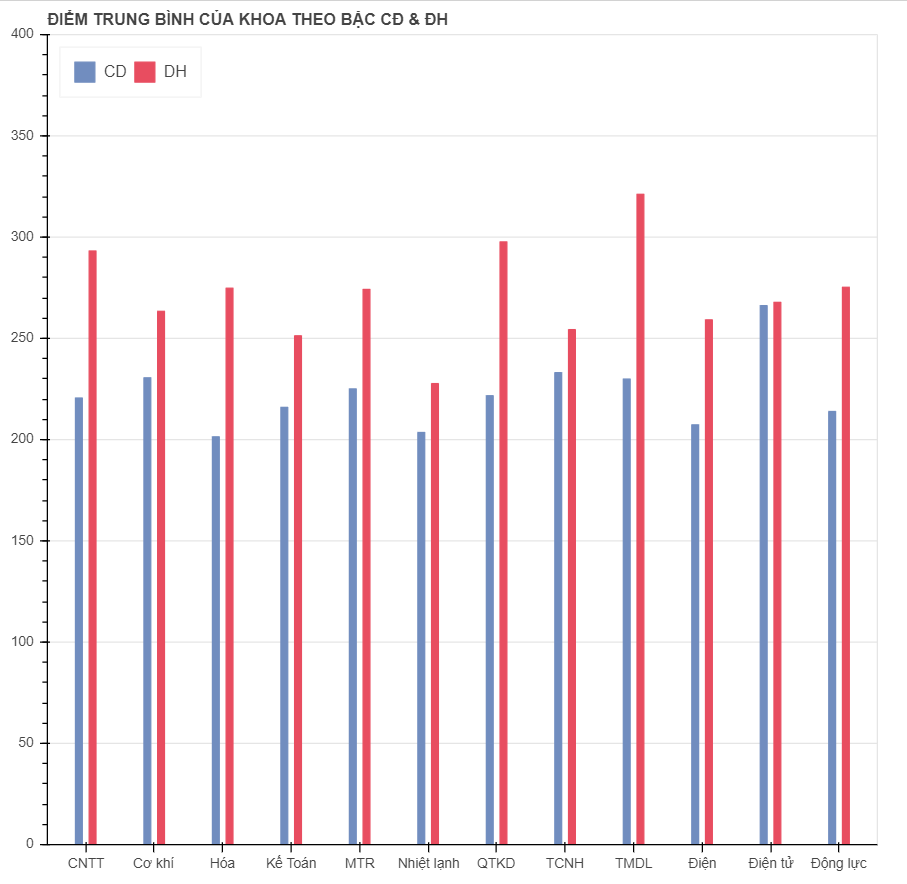

+ Qua đồ thị ta thấy chênh lệch quá rõ ràng giữa Đại học vs Cao đẳng theo từng khoa.
+ Dù ở khoa nào thì hệ Đại học vẫn hơn và chênh lệch ít nhất chỉ có khoa Điện tử.
+ Từ đó ta có thể thấy nếu thật sự muốn áp dụng chương trình học nước ngoài tài liệu nước ngoài thì nên áp dụng vào hệ Đại học thì sinh viên sẽ dễ tiếp cận hơn .

# Câu 5 : Bộ dữ liệu này có các khoa nào 

+ Sử dụng cột khoa để trả lời câu hỏi 

In [46]:
dfKhoa=df[['KHOA']]

In [47]:
dfKhoa.head(10)

,KHOA
0,CNTT
1,CNTT
2,CNTT
3,CNTT
4,CNTT
5,CNTT
6,CNTT
7,CNTT
8,CNTT
9,CNTT


In [48]:
dfKhoa.groupby(by=('KHOA')).count()

""
KHOA
CNTT
Cơ khí
Hóa
Kế Toán
Kế toán
Luật
MTR
Nhiệt lạnh
QTKD


+ Liệt kê các khoa riêng biệt được nhưng không đếm được số lượng sinh viên từng khoa để thấy sự phân bố các khoa
+ Tìm được phương thức value_counts để đếm được số lượng sinh viên

In [49]:
dfKhoa.KHOA.value_counts()

QTKD          904
Động lực      869
TMDL          635
CNTT          614
Cơ khí        557
Điện          517
Kế toán       494
MTR           311
TCNH          293
Điện tử       288
VSHTP         276
Hóa           255
Kế Toán       246
Nhiệt lạnh    214
Luật          152
Xây dựng      145
Viện MT        64
hóa             1
Name: KHOA, dtype: int64

+ Ngoài ra hàm còn có chức năng tính tần xuất của các sinh viên từng khoa 

In [50]:
dfKhoa.KHOA.value_counts(normalize=True)

QTKD          0.132260
Động lực      0.127140
TMDL          0.092904
CNTT          0.089832
Cơ khí        0.081492
Điện          0.075640
Kế toán       0.072275
MTR           0.045501
TCNH          0.042868
Điện tử       0.042136
VSHTP         0.040380
Hóa           0.037308
Kế Toán       0.035991
Nhiệt lạnh    0.031309
Luật          0.022238
Xây dựng      0.021214
Viện MT       0.009364
hóa           0.000146
Name: KHOA, dtype: float64

+ Điều chỉnh thông số với phương thức apply() nhân thêm 100 và là tròn 2 số thập phân để ra chỉ số phần trăm

In [51]:
dfKhoaTest = dfKhoa.KHOA.value_counts(normalize=True)

In [52]:
f = lambda x: round(x*100,2)
df1= dfKhoaTest.apply(f)
df1

QTKD          13.23
Động lực      12.71
TMDL           9.29
CNTT           8.98
Cơ khí         8.15
Điện           7.56
Kế toán        7.23
MTR            4.55
TCNH           4.29
Điện tử        4.21
VSHTP          4.04
Hóa            3.73
Kế Toán        3.60
Nhiệt lạnh     3.13
Luật           2.22
Xây dựng       2.12
Viện MT        0.94
hóa            0.01
Name: KHOA, dtype: float64

+ Để biểu hiện sự phân bố vì thế đã chọn pie chart

In [53]:
labels = 'QTKD','Động lực','TMDL','CNTT','Cơ khí','Điện','Kế toán','MTR','TCNH','Điện tử','VSHTP','Hóa','Kế Toán','Nhiệt lạnh','Luật','Xây dựng','Viện MT','hóa'
sizes = [13.23 , 12.71    , 9.29 , 8.98 , 8.15   , 7.56 , 7.23    , 4.55, 4.29 , 4.21    , 4.04  , 3.73, 3.60    , 3.13       , 2.22 , 2.12     , 0.94    , 0.01]
explode = (  0 , 0        ,0     ,0     ,0       ,0     ,0        ,   0 ,0     ,0        ,0      ,0    ,0        ,0           ,0     ,0         ,0        ,0)

fig1, ax1 = plt.subplots(figsize=(200, 100))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

+ Đọc qua code thấy các dữ liệu cần đưa vào là labels(các khoa),sizes(phần trăm sinh viên), explode(khoản cách các phần)
+ Nhưng nhận thấy chưa có chú thích nên tìm cách để thể hiện

+ Với biểu đồ donut chart cũng chỉ cần Khoa, data(phần trăm sinh viên) mà có thêm chú thích

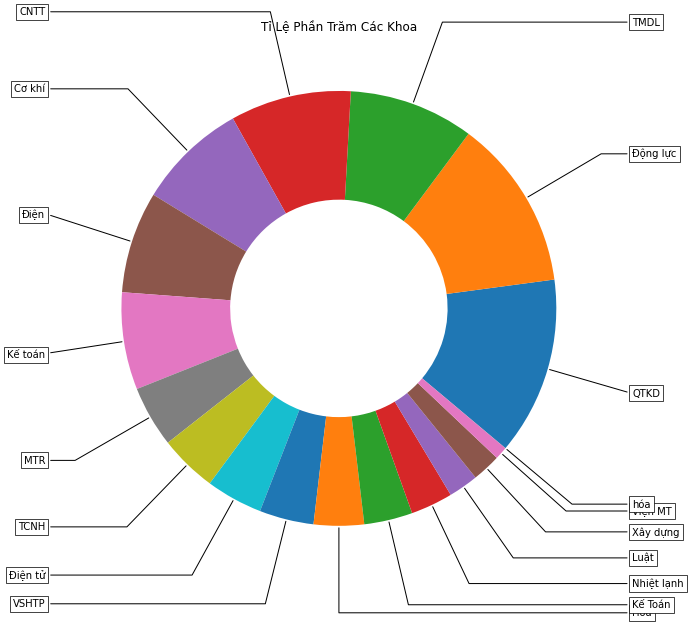

In [54]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

Khoa = ['QTKD','Động lực','TMDL','CNTT','Cơ khí','Điện','Kế toán','MTR','TCNH','Điện tử','VSHTP','Hóa','Kế Toán','Nhiệt lạnh','Luật','Xây dựng','Viện MT','hóa']

data = [13.23 , 12.71    , 9.29 , 8.98 , 8.15   , 7.56 , 7.23    , 4.55, 4.29 , 4.21    , 4.04  , 3.73, 3.60    , 3.13       , 2.22 , 2.12     , 0.94    , 0.01]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(Khoa[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Tỉ Lệ Phần Trăm Các Khoa")

plt.show()

+ Nhưng nhận thấy donut chart hay pie chart vẫn chưa thể hiện được rõ với các dữ liệu ít sinh viên
+ Đổi hướng sử dụng biểu khác để thể hiện phần chưa rõ

In [90]:
fruits = ['QTKD','Động lực','Kế toán','TMDL','CNTT','Cơ khí','Điện','MTR','TCNH','Điện tử','VSHTP','Hóa','Nhiệt lạnh','Luật','Xây dựng','Viện MT']
counts = [904   ,869       ,740      ,635   ,614   ,557     ,517   ,311  ,293   ,288      ,276    ,256  ,214         ,152   ,145       ,64       ]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))

ht = HoverTool(tooltips=[("KHOA","@{fruits}"),("Số Lượng","@{counts}")])
p5 = figure(x_range=fruits, plot_height=600,plot_width=900, title="Số lượng Sinh Viên",tools=[ht])
p5.vbar(x='fruits', top='counts', width=1, source=source, legend_field="fruits",
       line_color='white', fill_color=factor_cmap('fruits', palette=Category20_20, factors=fruits))

p5.xgrid.grid_line_color = None
p5.y_range.start = 0
p5.y_range.end = 1000
p5.legend.orientation = "vertical"
p5.legend.location = "top_right"
p5.title.text = 'Bảng So Sánh Số Lượng Sinh Viên Các Khoa'

show(p5)

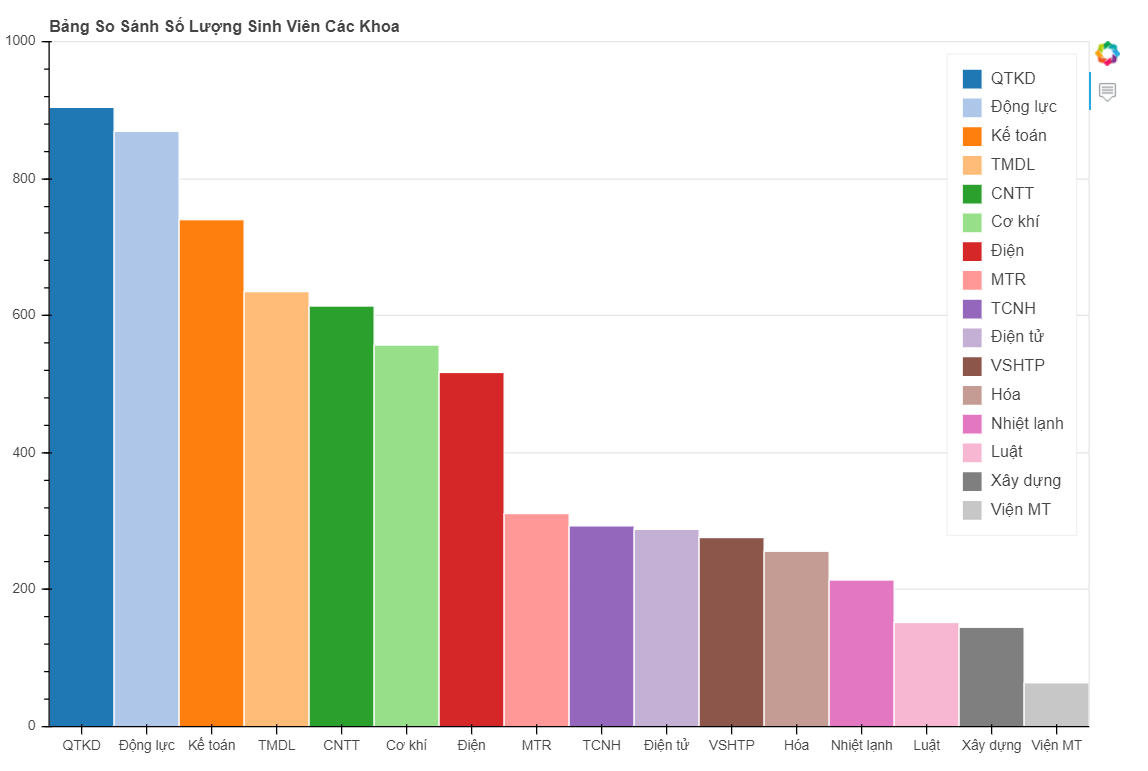

* Qua khảo sát bar chart có thể thấy :
 top 1 là Quản trị kinh doanh & Động lục
 top 2 là Thương mại du lịch, CNTT, cơ khí , điện , kế toán
 .....
 Hầu hết các dữ liệu đầy đủ các khoa

# Câu 6: giữa đọc và nghe sinh viên giỏi kỹ năng nào hơn

+ Sử dụng cột đọc nghe để trả lời câu hỏi 

In [56]:
dfDiem=df[['MÔN ĐỌC','MÔN NGHE']]
dfDiem

,MÔN ĐỌC,MÔN NGHE
0,80.0,185.0
1,45.0,120.0
2,110.0,145.0
3,60.0,90.0
4,60.0,185.0
...,...,...
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN


+ Quan sát dữ liệu

In [57]:
dfDiem.describe()

,MÔN ĐỌC,MÔN NGHE
count,6835.000000,6835.000000
mean,103.920263,149.115582
std,51.575034,49.362380
min,5.000000,5.000000
25%,60.000000,120.000000
50%,90.000000,145.000000
75%,120.000000,160.000000
max,470.000000,495.000000


+ Phát hiện điểm Nghe có mean cao hơn nhưng thật sự chính xác ?
+ Bởi min cả 2 kỹ năng là như nhau nhưng max Nghe lại hơn khi lấy mean sẽ có sự ảnh hưởng 
+ Vì thế tìm cách thể hiện mật độ xuất hiện các ngưỡng điểm và tìm cách thấy độ ổn định số điểm giữa 2 kỹ năng sẽ có sự đánh giá chính xác hơn

In [58]:
dfDiem.tail(10)

,MÔN ĐỌC,MÔN NGHE
6832,170.0,200.0
6833,90.0,145.0
6834,110.0,50.0
6835,NaN,NaN
6836,NaN,NaN
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN
6841,NaN,NaN


+ Tần suất điểm tăng dần theo điểm đọc

In [59]:
listdoc2 = dfDiem['MÔN ĐỌC'].sort_values().value_counts(sort=False).tolist()
listdoc2

[31,
 49,
 158,
 1017,
 896,
 778,
 39,
 1,
 26,
 1,
 15,
 562,
 1,
 2,
 3,
 635,
 5,
 120,
 843,
 19,
 259,
 6,
 6,
 1094,
 72,
 158,
 11,
 28]

+ Tần suất điểm tăng dần theo điểm nghe

In [60]:
listnghe2 = dfDiem['MÔN NGHE'].sort_values().value_counts(sort=False).tolist()
listnghe2

[8,
 1,
 6,
 787,
 832,
 971,
 809,
 12,
 32,
 2,
 2,
 1,
 9,
 364,
 782,
 96,
 65,
 2,
 1242,
 8,
 3,
 20,
 316,
 3,
 145,
 9,
 20,
 46,
 27,
 13,
 3,
 9,
 190]

In [61]:
data1 = pd.DataFrame(dfDiem['MÔN ĐỌC'].value_counts())
data1.reset_index()

,index,MÔN ĐỌC
0,110.0,1094
1,60.0,1017
2,80.0,896
3,90.0,843
4,120.0,778
5,150.0,635
6,45.0,562
7,170.0,259
8,30.0,158
9,180.0,158


In [62]:
data2 = pd.DataFrame(dfDiem['MÔN NGHE'].value_counts())
data2.reset_index()

,index,MÔN NGHE
0,145.0,1242
1,160.0,971
2,100.0,832
3,185.0,809
4,120.0,787
5,130.0,782
6,90.0,364
7,200.0,316
8,215.0,190
9,250.0,145


In [63]:
listdoc = list(dfDiem['MÔN ĐỌC'].unique())
listdoc.pop(len(listdoc)-1)
listdoc

[80.0,
 45.0,
 110.0,
 60.0,
 150.0,
 180.0,
 90.0,
 30.0,
 260.0,
 170.0,
 120.0,
 20.0,
 230.0,
 215.0,
 5.0,
 270.0,
 355.0,
 305.0,
 240.0,
 365.0,
 385.0,
 325.0,
 290.0,
 335.0,
 410.0,
 470.0,
 395.0,
 420.0]

+ Điểm đọc tăng dần 

In [64]:
listdoc.sort()
listdoc

[5.0,
 20.0,
 30.0,
 45.0,
 60.0,
 80.0,
 90.0,
 110.0,
 120.0,
 150.0,
 170.0,
 180.0,
 215.0,
 230.0,
 240.0,
 260.0,
 270.0,
 290.0,
 305.0,
 325.0,
 335.0,
 355.0,
 365.0,
 385.0,
 395.0,
 410.0,
 420.0,
 470.0]

In [65]:
listnghe = list(dfDiem['MÔN NGHE'].unique())
listnghe.pop(len(listnghe)-1)
listnghe

[185.0,
 120.0,
 145.0,
 90.0,
 160.0,
 130.0,
 330.0,
 100.0,
 200.0,
 395.0,
 215.0,
 270.0,
 300.0,
 75.0,
 250.0,
 25.0,
 315.0,
 50.0,
 65.0,
 365.0,
 5.0,
 405.0,
 280.0,
 460.0,
 15.0,
 470.0,
 345.0,
 495.0,
 380.0,
 425.0,
 40.0,
 485.0,
 440.0]

+ Điểm nghe tăng dần

In [66]:
listnghe.sort()
listnghe

[5.0,
 15.0,
 25.0,
 40.0,
 50.0,
 65.0,
 75.0,
 90.0,
 100.0,
 120.0,
 130.0,
 145.0,
 160.0,
 185.0,
 200.0,
 215.0,
 250.0,
 270.0,
 280.0,
 300.0,
 315.0,
 330.0,
 345.0,
 365.0,
 380.0,
 395.0,
 405.0,
 425.0,
 440.0,
 460.0,
 470.0,
 485.0,
 495.0]

+ Sử dụng biểu đồ line chart trả lời câu hỏi 

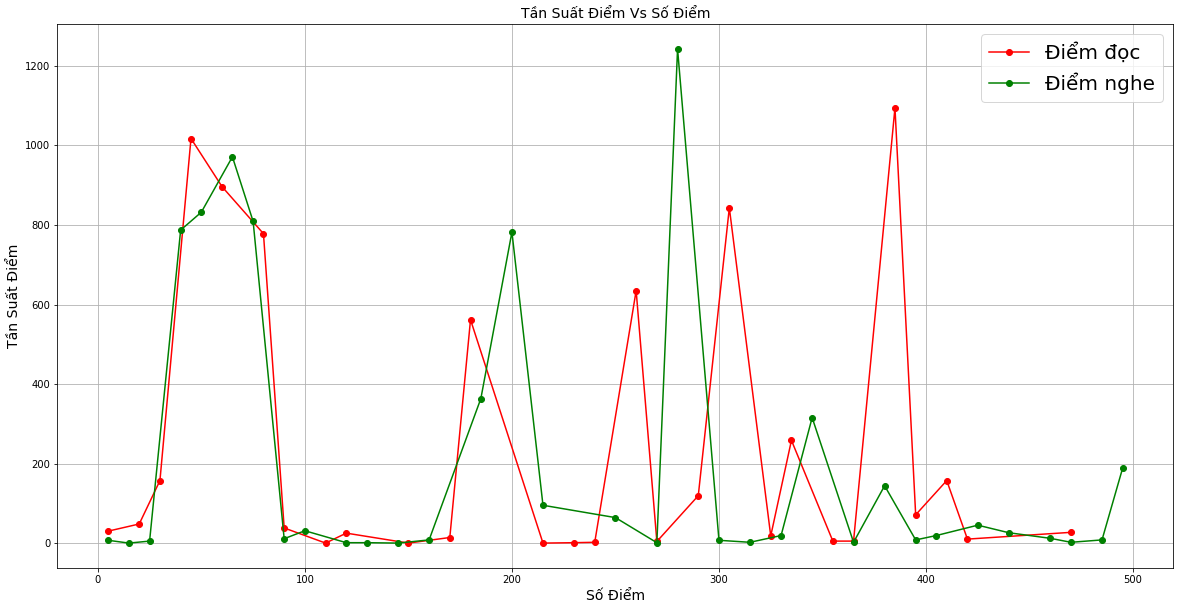

In [67]:
plt.figure(figsize=(20,10)) 
plt.plot(listdoc, listdoc2, color='red', marker='o',label='Điểm đọc')
plt.plot(listnghe, listnghe2, color='green', marker='o',label='Điểm nghe')
plt.title('Tần Suất Điểm Vs Số Điểm', fontsize=14)
plt.xlabel('Số Điểm', fontsize=14)
plt.ylabel('Tần Suất Điểm', fontsize=14)
plt.legend(prop={'size': 20})
plt.grid(True)
plt.show()

+ So về điểm trung bình giữa đọc và nghe ta thấy được điểm nghe ta có trung bình cao hơn hẳn gần 50 phần trăm 
+ Nhưng khi nhìn qua đồ thị line chart về điểm nghe và đọc ta lại thấy điểm đọc lại có giá trị ổn định hơn điểm nghe 
=> điều này có thể giải thích được vì hầu hết chương trình dạy Tiếng Anh ở Việt Nam mình tập trung vào phần ngữ pháp

# Câu 7: Liệu có sự ảnh hưởng giữa ngành sinh viên đang học với Tiếng Anh hay không?

+ Tạo data columns Khoa vs Tổng điểm để trả lời câu hỏi 

In [68]:
dfKhoavsTotal = df[['KHOA','TỔNG ĐIỂM']]
dfKhoavsTotal

,KHOA,TỔNG ĐIỂM
0,CNTT,265.0
1,CNTT,165.0
2,CNTT,255.0
3,CNTT,150.0
4,CNTT,245.0
...,...,...
6837,NaN,NaN
6838,NaN,NaN
6839,NaN,NaN
6840,NaN,NaN


+ Đếm dữ liệu nan

In [69]:
dfKhoavsTotal.isna().sum()

KHOA         7
TỔNG ĐIỂM    7
dtype: int64

+ Bộ data đếm tới hàng 6842 mà dữ liệu chỉ tới 6835 nên 7 nan không nằm trong data

+ Loại dữ liệu nan 

In [70]:
dfKhoavsTotal = dfKhoavsTotal.dropna()
dfKhoavsTotal

,KHOA,TỔNG ĐIỂM
0,CNTT,265.0
1,CNTT,165.0
2,CNTT,255.0
3,CNTT,150.0
4,CNTT,245.0
...,...,...
6830,Xây dựng,255.0
6831,Xây dựng,220.0
6832,Xây dựng,370.0
6833,Xây dựng,235.0


+ lọc điểm dưới 250

In [71]:
dflow = dfKhoavsTotal.loc[df['TỔNG ĐIỂM']<250]
dflow

,KHOA,TỔNG ĐIỂM
1,CNTT,165.0
3,CNTT,150.0
4,CNTT,245.0
5,CNTT,205.0
6,CNTT,220.0
...,...,...
6828,Xây dựng,160.0
6829,Xây dựng,235.0
6831,Xây dựng,220.0
6833,Xây dựng,235.0


+ Đếm số lượng sinh viên dưới 250

In [72]:
dflow['KHOA'].value_counts()

Động lực      612
QTKD          431
Cơ khí        361
CNTT          347
Điện          336
Kế toán       265
TMDL          254
Kế Toán       179
Nhiệt lạnh    163
TCNH          157
MTR           153
Điện tử       138
Hóa           111
VSHTP         110
Xây dựng       83
Luật           81
Viện MT        39
Name: KHOA, dtype: int64

+ Có giá trị trùng Kế toán vs Kế Toán . Gộp lại vs nhau 

In [73]:
dflow = dflow.replace("Kế Toán","Kế toán")
dflow

,KHOA,TỔNG ĐIỂM
1,CNTT,165.0
3,CNTT,150.0
4,CNTT,245.0
5,CNTT,205.0
6,CNTT,220.0
...,...,...
6828,Xây dựng,160.0
6829,Xây dựng,235.0
6831,Xây dựng,220.0
6833,Xây dựng,235.0


+ Sử dụng hàm value để sử lý data chuyển về giá trị phần trăm .

In [74]:
dflow['KHOA'].value_counts(normalize=True)

Động lực      0.160209
Kế toán       0.116230
QTKD          0.112827
Cơ khí        0.094503
CNTT          0.090838
Điện          0.087958
TMDL          0.066492
Nhiệt lạnh    0.042670
TCNH          0.041099
MTR           0.040052
Điện tử       0.036126
Hóa           0.029058
VSHTP         0.028796
Xây dựng      0.021728
Luật          0.021204
Viện MT       0.010209
Name: KHOA, dtype: float64

In [75]:
f = lambda x: round(x*100,2)
dflow['KHOA'].value_counts(normalize=True,sort=False).apply(f)

Hóa            2.91
Kế toán       11.62
Điện           8.80
Xây dựng       2.17
Nhiệt lạnh     4.27
QTKD          11.28
Viện MT        1.02
TMDL           6.65
Động lực      16.02
VSHTP          2.88
CNTT           9.08
Luật           2.12
TCNH           4.11
Điện tử        3.61
MTR            4.01
Cơ khí         9.45
Name: KHOA, dtype: float64

In [76]:
listlow = list(dflow['KHOA'].unique())
listlow

['CNTT',
 'Cơ khí',
 'Điện',
 'Điện tử',
 'Động lực',
 'Hóa',
 'Kế toán',
 'Luật',
 'MTR',
 'Nhiệt lạnh',
 'QTKD',
 'TCNH',
 'TMDL',
 'Viện MT',
 'VSHTP',
 'Xây dựng']

+ Sử dụng bar chart biểu diễn 

In [77]:
fruits = ['CNTT','Cơ khí','Điện','Điện tử','Động lực','Hóa','Kế toán','Luật','MTR','Nhiệt lạnh','QTKD','TCNH','TMDL','Viện MT','VSHTP','Xây dựng']
counts = [9.08  ,9.45    ,8.80  ,3.61     ,16.02     ,2.91 ,11.62    ,2.12  ,4.01 ,4.27        ,11.28 ,4.11  ,6.65  ,1.02     ,2.88   ,2.17      ]

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))
ht = HoverTool(tooltips=[("KHOA","@{fruits}"),("Phần trăm","@{counts}")])

p6 = figure(x_range=fruits, plot_height=600,plot_width=900, toolbar_location=None, title="Số lượng Sinh Viên",tools=[ht])
p6.vbar(x='fruits', top='counts', width=1, source=source, legend_field="fruits",
       line_color='white', fill_color=factor_cmap('fruits', palette=Category20_20, factors=fruits))

p6.xgrid.grid_line_color = None
p6.y_range.start = 0
p6.y_range.end = 100
p6.legend.orientation = "vertical"
p6.legend.location = "top_right"
p6.title.text = 'Bảng So Sánh Số Lượng Sinh Viên Điểm Thấp Các Khoa'

show(p6)

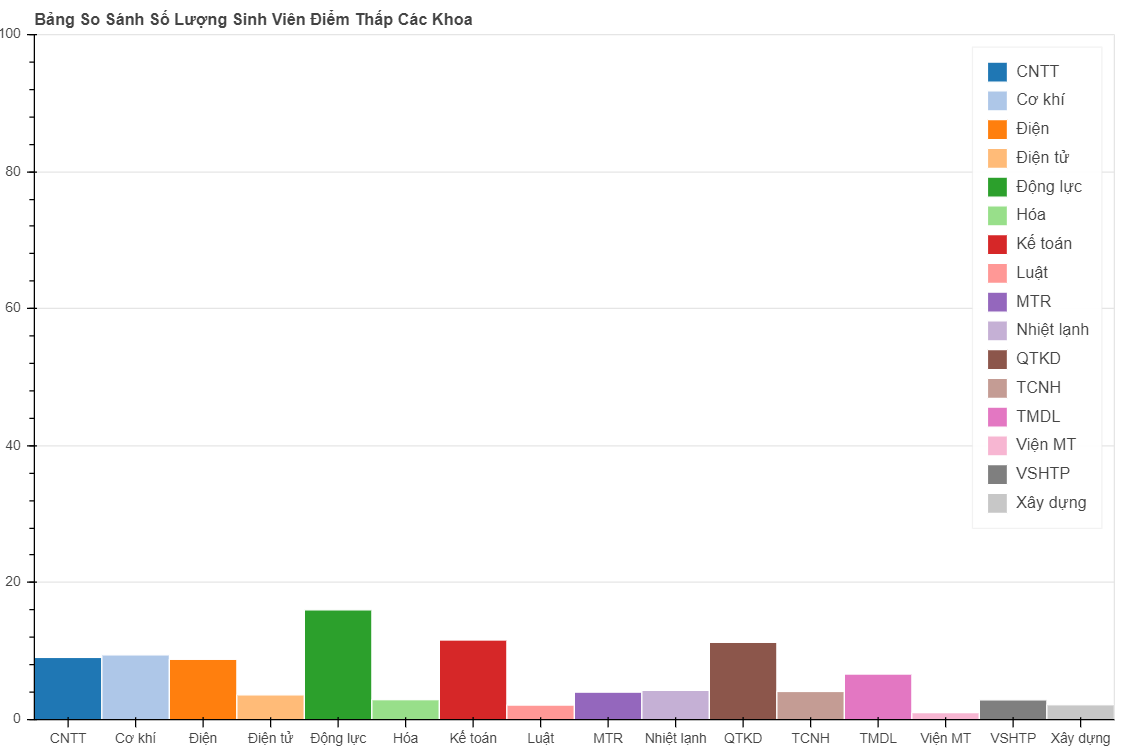

+ Qua đồ thị ta thấy sinh viên chiếm nhiều nhất trong tổng số sinh viên dưới 250 là Động lực học, top 2: Kế toán,QTKD,top 3: CNTT,Cơ Khí,Điện.
+ Tỉ lệ điểm thấp khá ít nhưng ta có hơn 50% sinh viên các khoa điểm thấp liệu phần trăm này có đúng hay không hay thay đổi đồ thị để có cái nhìn rõ hơn
+ Đổi hướng thể hiện dữ liệu làm sao thể hiện phần trăm sv dưới điểm thấp chiếm bao nhiêu phần trăm so vs tổng số sinh viên từng khoa 

+ Tạo data có khoa và số lượng sinh viên dưới 250 điểm 

In [78]:
datalow = pd.DataFrame(dflow['KHOA'].value_counts()).reset_index()
datalow

,index,KHOA
0,Động lực,612
1,Kế toán,444
2,QTKD,431
3,Cơ khí,361
4,CNTT,347
5,Điện,336
6,TMDL,254
7,Nhiệt lạnh,163
8,TCNH,157
9,MTR,153


+ Lấy data tổng sinh viên từng khoa 

In [79]:
datakhoa = pd.DataFrame(dfKhoa.KHOA.value_counts())
datakhoa

,KHOA
QTKD,904
Động lực,869
TMDL,635
CNTT,614
Cơ khí,557
Điện,517
Kế toán,494
MTR,311
TCNH,293
Điện tử,288


+ Xử lý giá trị trùng 

In [80]:
dfKhoa = dfKhoa.replace("Kế Toán","Kế toán")
dfKhoa = dfKhoa.replace("hóa","Hóa")
dfKhoa.KHOA.value_counts()

QTKD          904
Động lực      869
Kế toán       740
TMDL          635
CNTT          614
Cơ khí        557
Điện          517
MTR           311
TCNH          293
Điện tử       288
VSHTP         276
Hóa           256
Nhiệt lạnh    214
Luật          152
Xây dựng      145
Viện MT        64
Name: KHOA, dtype: int64

In [81]:
datakhoa = pd.DataFrame(dfKhoa.KHOA.value_counts()).reset_index()
datakhoa

,index,KHOA
0,QTKD,904
1,Động lực,869
2,Kế toán,740
3,TMDL,635
4,CNTT,614
5,Cơ khí,557
6,Điện,517
7,MTR,311
8,TCNH,293
9,Điện tử,288


+ Merge datakhoa vs datalow

In [82]:
 dataxy = pd.merge(datakhoa,
 datalow,
 how='outer',
 on='index')
dataxy

,index,KHOA_x,KHOA_y
0,QTKD,904,431
1,Động lực,869,612
2,Kế toán,740,444
3,TMDL,635,254
4,CNTT,614,347
5,Cơ khí,557,361
6,Điện,517,336
7,MTR,311,153
8,TCNH,293,157
9,Điện tử,288,138


+ Tạo cột frequency thể hiện phần trăm học sinh dưới 250 điểm chiếm trong từng khoa

In [83]:
dataxy['frequency'] = round((dataxy['KHOA_y']*100) / dataxy['KHOA_x'],0)
dataxy

,index,KHOA_x,KHOA_y,frequency
0,QTKD,904,431,48.0
1,Động lực,869,612,70.0
2,Kế toán,740,444,60.0
3,TMDL,635,254,40.0
4,CNTT,614,347,57.0
5,Cơ khí,557,361,65.0
6,Điện,517,336,65.0
7,MTR,311,153,49.0
8,TCNH,293,157,54.0
9,Điện tử,288,138,48.0


+ Tạo List Khoa

In [84]:
listindex = list(dataxy['index'])
listindex

['QTKD',
 'Động lực',
 'Kế toán',
 'TMDL',
 'CNTT',
 'Cơ khí',
 'Điện',
 'MTR',
 'TCNH',
 'Điện tử',
 'VSHTP',
 'Hóa',
 'Nhiệt lạnh',
 'Luật',
 'Xây dựng',
 'Viện MT']

+ Tạo List phần trăm 

In [85]:
listfrequency = list(dataxy['frequency'])
listfrequency

[48.0,
 70.0,
 60.0,
 40.0,
 57.0,
 65.0,
 65.0,
 49.0,
 54.0,
 48.0,
 40.0,
 43.0,
 76.0,
 53.0,
 57.0,
 61.0]

+ Biểu diễn lại bar chart 

In [86]:
fruits = listindex
counts = listfrequency

source = ColumnDataSource(data=dict(fruits=fruits, counts=counts))
ht = HoverTool(tooltips=[("KHOA","@{fruits}"),("Phần trăm","@{counts}")])

p7 = figure(x_range=fruits, plot_height=600,plot_width=900, toolbar_location=None, title="Số lượng Sinh Viên",tools=[ht])
p7.vbar(x='fruits', top='counts', width=1, source=source,
       line_color='white', fill_color=factor_cmap('fruits', palette=Category20_20, factors=fruits))

p7.xgrid.grid_line_color = None
p7.y_range.start = 0
p7.y_range.end = 100
p7.title.text = 'Bảng So Sánh Số Lượng Sinh Viên Điểm Thấp Các Khoa'

show(p7)

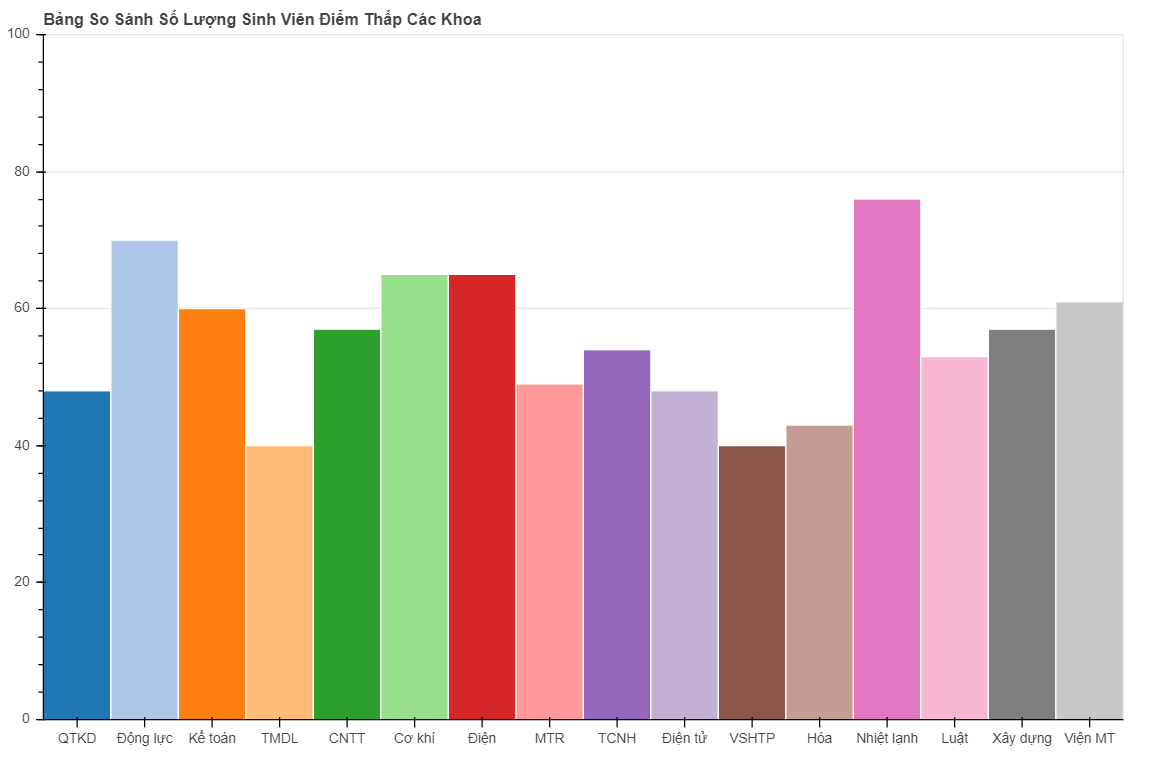

+ Xét tổng quát hầu hết gần 50% sinh viên từng khoa là dưới 250 điểm . Một tình trạng đáng nguy hiểm của sinh viên trường ta.
+ Xét về số lượng và phần trăm thể hiện trên . Với các khoa số lượng sinh viên cao như QTKD,Động lực,Kế toán,CNTT,Cơ khí,Điện mà với phần trăm sinh viên dưới 250 cao vậy thì củng đáng xem xét.
+ Chỉ có TMDL là ngành có số lượng sinh viên cao mà có phần trăm dưới 250 là thấp nhất 40% thôi.

In [88]:
#Công cụ bảng điều khiển
from bokeh.layouts import gridplot

In [91]:
grid = gridplot([[p, p2],[p3,p4],[p5,p6],[p7]], plot_width=850, plot_height=350)
show(grid)